# Project
## Link to github repository
https://github.com/sunxinyan79214219/my-dcsi-project-Use-version/blob/main/new%20use%20homework%20project%201.ipynb


Predicting Newsletter Subscriptions: A Deep Dive into Player Behaviors and Demographics Within a Minecraft Server Ecosystem


# Introduction

## Background


In the dynamic landscape of the video game industry, deciphering player behavior stands as a cornerstone for crafting immersive experiences and nurturing enduring player relationships. Game - related newsletters serve as a vital conduit for developers to stay connected with their audience, delivering a mix of updates, promotions, and community spotlights. Yet, the decision to subscribe to these newsletters varies among players. Pinpointing the characteristics and behaviors most strongly linked to subscription empowers developers to tailor communication strategies and enhance outreach efforts.
This report leverages player data from a Minecraft server environment. It delves into patterns governing newsletter subscriptions, drawing on variables like gameplay habits (such as the frequency of sessions), demographic factors (including age), and experience levels.

Data Description
The dataset includes anonymized player-level information from a Minecraft multiplayer server, combining gameplay activity, demographic data, and newsletter subscription status.

Question:For the Question I choose, I choose Question1, What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, 
and how do these features differ between various player types?

Data Description

Number of observations (players): 196

Number of variables: Initially 9, refined to 4 after data cleaning

Source: Gathered via user accounts and server logs

Data collection method: Derived from gameplay logs and demographic information submitted by users

Response variable: subscribe – indicates if a player subscribed to the newsletter (taking values of TRUE or FALSE)

# players.csv: A list of all unique players, including data about each player.




- **Variable summary**













  



| Column Name     | Description                                | Type     |
|------------------|--------------------------------------------|----------|
| `hashedEmail`    | Unique ID for each player                  | Categorical   |
| `subscribe`      | Whether the player subscribed to the newsletter (True or False) | Logical  |
| `experience`     | Player experience level (e.g., Pro, Amateur) | Categorical   |
| `gender`         | Player's gender                            | Categorical   |
| `Age`            | Player's age                               | Numeric  |
| `played_hours`   | Total hours the player spent in the game   | Numetric   |
| `name`           | Player’s in-game name (not used here)      | Categorical   |
| `hashedEmail`        | Unique ID to match with `players.csv`       | Categorical   |
| `original_start_time`| Start time of the session (Unix timestamp) | Numeric   |
| `original_end_time`  | End time of the session (Unix timestamp)   | Numeric   |

# session.csv: A list of individual play sessions by each player, including data about the session.

- **Variable summary**:














| Column Name     | Description                                | Type     |
|------------------|--------------------------------------------|----------|
| `hashedEmail`    | Unique player identifier (matches players.csv)               | Categorical   |
| `start_time`      | Session start time (DD/MM/YYYY HH:MM) | Datetime  |
| `end_time`     | Session end time (DD/MM/YYYY HH:MM) | Datetime   |
| `original_start_time`         | Session start time (Unix timestamp in scientific notation)                           | Numeric   |
| `original_end_time`            |Session end time (Unix timestamp in scientific notation)                              | Numeric  |















## Key characteristics of the data:

Multiple sessions per player (panel/longitudinal data)

Time-stamped behavioral data

Hashed email addresses for privacy

Potentially large number of observations (based on sample data)










# Methods & Results

# Step 1: Load and Prepare the Data from players.csv and sessions.csv
Firstly, I should loaded the necessary libraries to support data wrangling, visualization, and modeling.

Then, I used read_csv() to import the two provided CSV files: one containing player information and the other containing session data.

Second, I calculate the number of play sessions per player by grouping sessions.csv by hashedEmail (a unique player identifier) and using summarise(num_sessions = n()) to count sessions. This creates session_counts, a dataset mapping each player to their total session count .

Third, I merge session_counts with players.csv using a left join on hashedEmail to retain all player records while adding their session counts. I then filter out rows with missing num_sessions or Age data to ensure analysis validity .

Finally, I create an age_group variable to categorize players as "≥18" or "<18" using ifelse(Age >= 18, "≥18", "<18"), which helps analyze age-related subscription patterns . This workflow prepares the data for exploring how age and session frequency relate to newsletter subscriptions.

In [13]:
library(tidyverse)
library(repr)
library(tidymodels)
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")
library(dplyr)


# first, counts Calculate the number of sessions and merge data

session_counts <- sessions|>
  group_by(hashedEmail) |> 
  summarise(num_sessions = n())

players <- players |>
  left_join(session_counts, by = "hashedEmail") |>
  filter(!is.na(num_sessions) & !is.na(Age))

# Create age groups (≥ 18 vs<18)
players <- players |>
  mutate(age_group = ifelse(Age >= 18, "≥18", "<18"))
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age,num_sessions,age_group
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,<18
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,3,<18
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1,<18
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,1,≥18
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,1,≥18
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,1,≥18
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17,1,<18
Veteran,TRUE,7a4686586d290c67179275c7c3dfb4ea02f4d317d9ee0e2cee98baa27877a875,1.6,Lane,Female,23,3,≥18
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25,1,≥18


# Step 2: visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis

First, I use the ggplot2 package to create a bar chart visualizing the relationship between age groups and newsletter subscription status. By mapping age_group to the x-axis and subscribe to the fill aesthetic, I generate a dodged bar chart that separates subscription counts (TRUE/FALSE) within each age group ("≥18" and "<18"). The plot is titled "Subscription Rate by Age Group" and uses a minimal theme for clarity .

Second, I construct a box plot to compare session counts across age groups. The x-axis represents age_group, the y-axis shows num_sessions, and the fill aesthetic highlights each age group. This visualization, titled "Session Count by Age Group", helps identify differences in engagement (session frequency) between older and younger players, using boxplot quartiles to show distribution ranges . Both plots use theme_minimal() to ensure readability and adhere to data visualization best practices.

I also setting the plot size using options(repr.plot.width = 8, repr.plot.height = 6) to make ensure the figures are readable and well-scaled for presentation.


### Observations from the Visualizations
First, looking at the “Subscription Rate by Age Group” bar chart, we see that in both the “<18” and “≥18” age groups, the count of players who subscribed to the newsletter (shown in teal) is higher than those who didn’t (shown in red). Specifically, the “≥18” group has a notably larger number of subscribers compared to the “<18” group, suggesting that older players (aged 18 and above) are more likely to subscribe to the game - related newsletter. 

Second, the “Session Count by Age Group” box plot reveals interesting patterns about player engagement. Both age groups have some outliers with very high session counts, but the median session count for each group is relatively low. However, the “≥18” group appears to have a slightly wider spread of session counts, indicating more variability in the number of sessions among older players. This might imply that while there are older players who play very frequently (as seen in the outliers), there’s also a subset of older players with fewer sessions, creating a more diverse engagement pattern compared to the “<18” group. Overall, these visualizations suggest that age is associated with both subscription behavior and session frequency in this Minecraft server dataset. 

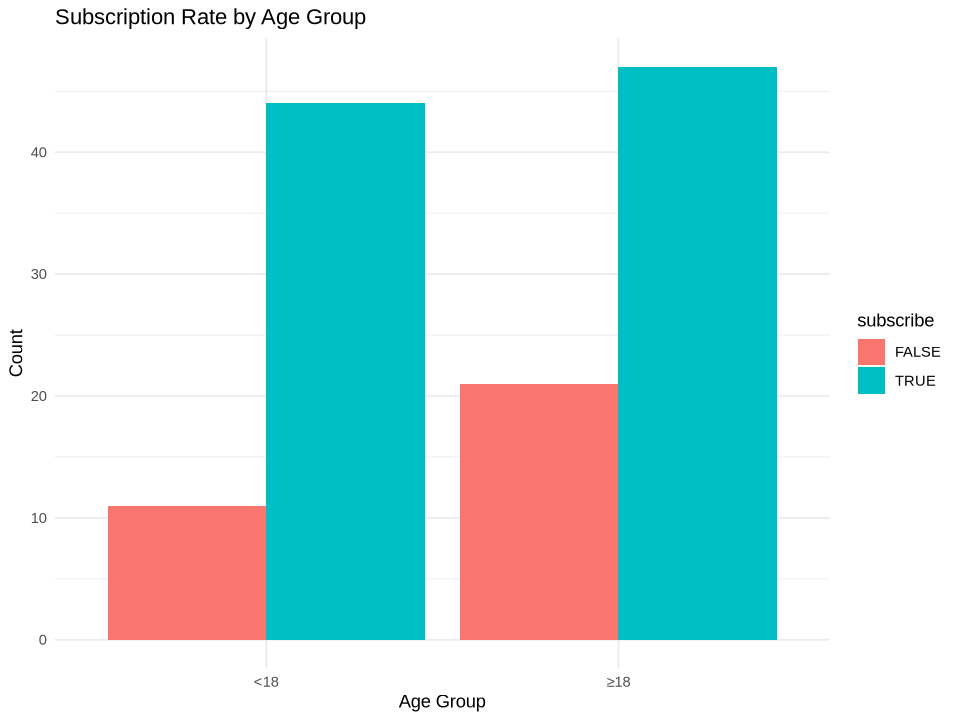

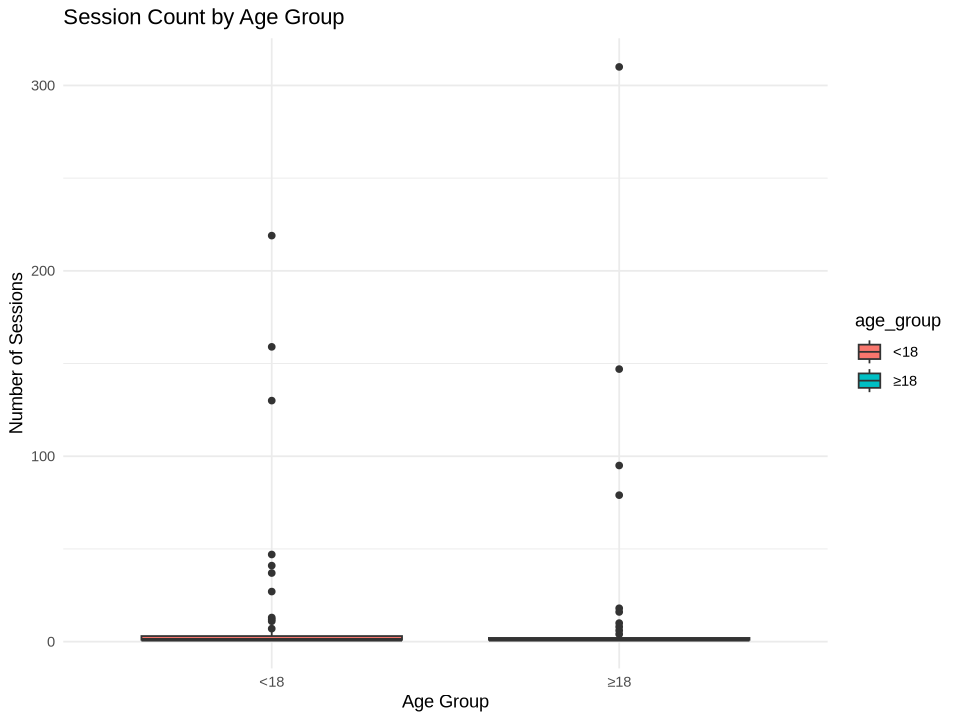

In [14]:
# Draw a bar chart of age groups and subscription status
options(repr.plot.width = 8, repr.plot.height = 6)

age_subscribe <- ggplot(players, aes(x = age_group, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(title = "Subscription Rate by Age Group", 
       x = "Age Group", y = "Count") +
  theme_minimal()
age_subscribe
# Draw a box plot of age groups and number of conversations
age_sessions <- ggplot(players, aes(x = age_group, y = num_sessions, fill = age_group)) +
  geom_boxplot() +
  labs(title = "Session Count by Age Group", 
       x = "Age Group", y = "Number of Sessions") +
  theme_minimal()
age_sessions

# step 3

### Step-by-Step Explanation of the Logistic Regression Analysis Process  

First, I convert the `subscribe` variable to a factor. This is crucial because logistic regression for classification in `tidymodels` requires the response variable to be a factor (categorical data type) rather than a logical or numeric type. By running `players <- players |> mutate(subscribe = as.factor(subscribe))`, I ensure the `subscribe` variable, which indicates whether a player subscribed to the newsletter, is formatted correctly for the modeling workflow.  

Second, I split the dataset to prepare for model training and evaluation. Using `initial_split(players, strata = subscribe)` with a seed of 42 for reproducibility, I divide the `players` data into a training set (`train_split`) and a testing set (`test_split`). Stratifying by `subscribe` helps maintain the same distribution of subscription statuses in both sets, which is important for accurate model assessment.  

Third, I define the model workflow. I start by creating a recipe with `age_recipe <- recipe(subscribe ~ age_group + num_sessions + experience, data = train_split) |> step_dummy(all_nominal_predictors())`. This recipe specifies that I want to predict `subscribe` using `age_group` (the two age categories), `num_sessions` (number of play sessions), and `experience` (player experience level). The `step_dummy` function converts categorical variables like `age_group` and `experience` into dummy/indicator variables, making them suitable for the logistic regression model.  

Next, I set up the logistic regression model itself: `logistic_model <- logistic_reg() |> set_engine("glm") %>% set_mode("classification")`. Here, I specify that I’m using a generalized linear model (GLM) engine for the logistic regression and that it’s a classification task (since we’re predicting a binary outcome: subscribed or not).  

Fourth, I fit the model to the training data and evaluate it on the testing data. I combine the recipe and model into a workflow with `logistic_workflow <- workflow() |> add_recipe(age_recipe) |> add_model(logistic_model) |> fit(data = train_split)`. Then, I generate predictions on the test set with `test_predictions <- predict(logistic_workflow, test_split) |> bind_cols(test_split)`, which attaches the predictions to the original test data for easy comparison.  

Finally, I assess the model’s performance. By running `model_metrics <- test_predictions |> metrics(truth = subscribe, estimate = .pred_class)`, I calculate metrics like accuracy to see how well the model predicts newsletter subscriptions. This step helps determine if factors like age group, session count, and experience are effective predictors of subscription behavior.  

From model_metrics, we can see the accuracy in the table is 74.19%. The tibble presents two key performance metrics from a binary classification logistic regression model predicting player newsletter subscriptions. The “accuracy” metric, with an estimate of approximately 0.7419 (or 74.19%), indicates the model correctly predicts subscription status for about 74.19% of cases in the test set. However, the “kap” (Cohen’s Kappa), which accounts for random chance in prediction agreement, has an estimate of 0. This means the model’s predictive performance is no better than random guessing, suggesting issues like class imbalance in the data, weak predictive power of the used features (age_group, num_sessions, experience), or the need for more sophisticated modeling approaches to effectively capture subscription - related patterns.


In [15]:
# Age group and subscription logistic regression analysis (Paragraphs 3-118 to 3-133, 3-168 to 3-188)
# Convert subscribe to factor FIRST
players <- players |>
  mutate(subscribe = as.factor(subscribe))  

# Data splitting
set.seed(42)
players_split <- initial_split(players, strata = subscribe)
train_split <- training(players_split)
test_split <- testing(players_split)

# Define model workflow
age_recipe <- recipe(subscribe ~ age_group + num_sessions + experience, data = train_split)|>
  step_dummy(all_nominal_predictors())

logistic_model <- logistic_reg() |>
  set_engine("glm") |>
  set_mode("classification")
logistic_model

# Fit and evaluate
logistic_workflow <- workflow() |>
  add_recipe(age_recipe) |> 
  add_model(logistic_model) |>
  fit(data = train_split)

test_predictions <- predict(logistic_workflow, test_split) |>
  bind_cols(test_split)
test_predictions

# Model performance
model_metrics <- test_predictions |>
  metrics(truth = subscribe, estimate = .pred_class)
model_metrics

Logistic Regression Model Specification (classification)

Computational engine: glm 


.pred_class,experience,subscribe,hashedEmail,played_hours,name,gender,Age,num_sessions,age_group
<fct>,<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<int>,<chr>
TRUE,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,27,<18
TRUE,Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25,1,≥18
TRUE,Regular,TRUE,20ae3f8b5323674fe6e537bc91928841cfc2a00c1b36522fd25370bb6fa89d36,0.6,Ryker,Male,19,2,≥18
TRUE,Amateur,TRUE,119f01b9877fc5ea0073d05602a353b91c4b48e4cf02f42bb8d661b46a34b760,0.7,Hugo,Female,21,1,≥18
TRUE,Veteran,TRUE,d07befbac08be3d876d026ac0458651067001b39081d24724af3c95be76355e0,0.1,Yvette,Non-binary,17,1,<18
TRUE,Veteran,TRUE,8d2eed1f399e0d77cebb8fcc48ed19ad2fa8e3bb3fa683cb90e0ac6d42677bf2,2.2,Cyrus,Male,24,1,≥18
TRUE,Amateur,FALSE,5c27e8b9fed2816b006dc8397ec04470b59339fd591a46a3eb7951b939b72984,0.9,Pablo,Male,18,1,≥18
TRUE,Veteran,TRUE,ca20f724571080b997e0efa874b9611e9f280c1af5f68ff6231a9e5b5d79bcfe,0.2,Edward,Male,38,1,≥18
TRUE,Regular,TRUE,5e0beb10f6163a508622ef25220d780bdd012a89dee571db77fc502980c0e57d,0.1,Ophelia,Male,15,1,<18


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7419355
kap,binary,0.0000000


# final step

First, I load the necessary `tidymodels` and `yardstick` packages to enable functions for model evaluation. These packages provide tools to assess how well the logistic regression model performs in predicting player newsletter subscriptions.  

Second, I calculate the confusion matrix using `conf_mat()`. This step involves taking the `test_predictions` data frame (which contains both the actual subscription statuses and the model’s predicted statuses) and specifying the columns for the true values (`subscribe`) and the predicted values (`.pred_class`). The confusion matrix will show how many predictions fall into categories like true positives, true negatives, false positives, and false negatives, giving a clear picture of where the model succeeds and fails.  

Third, to get a comprehensive set of classification metrics, I use `metric_set()` to define which metrics I want to calculate—specifically accuracy, precision, recall, the F - measure (`f_meas`), and Cohen’s Kappa (`kap`). Then, I apply these metrics to `test_predictions`, again specifying the `truth` (actual subscription status) and `estimate` (predicted subscription status) columns. This step computes key performance indicators: accuracy tells me the overall proportion of correct predictions; precision focuses on the ratio of true positives to all positive predictions; recall (or sensitivity) shows the ratio of true positives to all actual positives; the F - measure balances precision and recall; and Cohen’s Kappa accounts for agreement beyond random chance.  

Finally, by viewing `classification_metrics`, I can analyze these results to understand the model’s strengths and weaknesses in predicting whether players subscribe to the newsletter, which helps in deciding if adjustments to the model (like feature engineering or trying a different algorithm) are needed for better performance. 


Seen from the table we get, the output presents a comprehensive yet concerning evaluation of a binary classification model (likely predicting player newsletter subscriptions) through a confusion matrix, warning messages, and a metrics tibble.  

First, the confusion matrix reveals the model’s prediction distribution against actual outcomes. Rows represent predicted subscription statuses (FALSE/TRUE), and columns represent the true statuses. Here, the model never predicted “FALSE” – all predictions fell into the “TRUE” category. Specifically, there are 0 true negatives (correct “FALSE” predictions) and 0 false negatives (incorrect “FALSE” predictions for actual “TRUE” cases). In contrast, there are 8 false positives (incorrect “TRUE” predictions for actual “FALSE” cases) and 23 true positives (correct “TRUE” predictions).  

Second, the prominent pink warning messages explain critical gaps in metric calculation. For precision and the F - measure (`f_meas`), these metrics rely on both true positives and false positives to compute ratios. Since the model made no “FALSE” predictions, the sum of true positives and false positives for the “FALSE” class is zero. As a result, precision and `f_meas` can’t be calculated, leading to `NA` values in the metrics tibble.  

Third, the metrics tibble summarizes key performance indicators but highlights severe issues. The accuracy, at approximately 0.7419, suggests 74.2% of predictions are correct at first glance. However, this is misleading because the model only predicts one class. Recall (sensitivity) for the “FALSE” class is 0, meaning the model fails to identify any actual “FALSE” subscription cases. Cohen’s Kappa (`kap`), which accounts for agreement beyond random chance, is also 0, indicating the model’s performance is no better than random guessing for distinguishing between classes.  

Overall, the model suffers from extreme class bias, likely due to imbalanced training data (e.g., far more “TRUE” than “FALSE” subscription cases) or insufficient features to capture signals for “FALSE” subscriptions. To improve, one should check data balance with `table(players$subscribe)`, apply balancing techniques like oversampling the minority “FALSE” class, and enhance feature engineering to help the model differentiate between subscription statuses effectively. 

In [6]:
# Load required packages (if not already loaded)
library(tidymodels)
library(yardstick)

# Load required packages (if not already loaded)
library(tidymodels)
library(yardstick)

# Calculate confusion matrix
conf_matrix <- test_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)
conf_matrix

# Calculate metrics correctly
classification_metrics <- test_predictions |>
  metric_set(accuracy, precision, recall, f_meas, kap)(
    truth = subscribe,
    estimate = .pred_class)

# View results
classification_metrics

          Truth
Prediction FALSE TRUE
     FALSE     0    0
     TRUE      8   23

Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 8 true event(s) actually occurred for the problematic event level,
FALSE”
Warning message:
“While computing binary `precision()`, no predicted events were detected (i.e.
`true_positive + false_positive = 0`).
Precision is undefined in this case, and `NA` will be returned.
Note that 8 true event(s) actually occurred for the problematic event level,
FALSE”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7419355
precision,binary,NA
recall,binary,0.0000000
f_meas,binary,NA
kap,binary,0.0000000
